In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
# GET the data
## Memuat Data Training dan Testing
mnist = keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


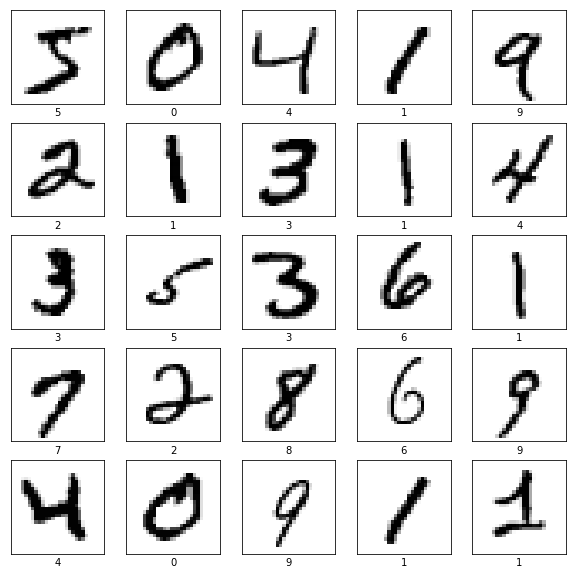

In [3]:
# EXPLORE the data
## Menampilkan 25 Gambar Pertama dari Data Training
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [4]:
## Menampilkan Ukuran Data Training
train_data.shape

(60000, 28, 28)

In [5]:
## Menampilkan Ukuran Data Testing
test_data.shape

(10000, 28, 28)

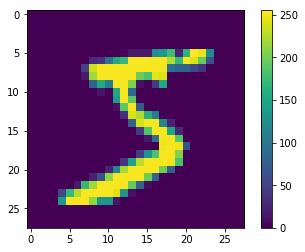

In [7]:
## Menampilkan Nilai dari Gambar
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# MODEL the data
## Pra Pengolahan - Standarisasi
train_data = train_data / 255.0
test_data = test_data / 255.0

In [9]:
## Pemilihan Model (Arsitektur dan Parameter)
units=128
learning_rate=1e-3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fit_data = train_data[:48001]
val_data = train_data[48001:]
fit_labels = train_labels[:48001]
val_labels = train_labels[48001:]
callbacks = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
model.fit(fit_data, fit_labels, batch_size=32, epochs=40,
         validation_data=(val_data, val_labels), callbacks=callbacks)

Instructions for updating:
Colocations handled automatically by placer.
Train on 48001 samples, validate on 11999 samples
Epoch 1/40
48001/48001 [==============================] - 8s 162us/sample - loss: 0.2870 - acc: 0.9193 - val_loss: 0.1565 - val_acc: 0.9528
Epoch 2/40
48001/48001 [==============================] - 7s 155us/sample - loss: 0.1276 - acc: 0.9624 - val_loss: 0.1355 - val_acc: 0.9614
Epoch 3/40
48001/48001 [==============================] - 7s 154us/sample - loss: 0.0869 - acc: 0.9741 - val_loss: 0.1004 - val_acc: 0.9688
Epoch 4/40
48001/48001 [==============================] - 7s 152us/sample - loss: 0.0639 - acc: 0.9811 - val_loss: 0.0985 - val_acc: 0.9715
Epoch 5/40
48001/48001 [==============================] - 7s 148us/sample - loss: 0.0498 - acc: 0.9852 - val_loss: 0.0943 - val_acc: 0.9707
Epoch 6/40
48001/48001 [==============================] - 7s 156us/sample - loss: 0.0389 - acc: 0.9880 - val_loss: 0.1022 - val_acc: 0.9709


In [10]:
## Evaluasi Model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0964 - acc: 0.9729
Test accuracy: 0.9729


In [13]:
## Penyimpanan Model
from google.colab import drive
drive.mount('/content/drive/')


model.save('/content/drive/My Drive/Pengmas/Workshop/MPGames/AIAcademy/Data/mnist_nn.h5')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


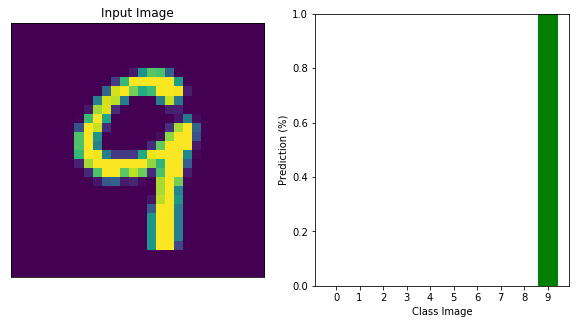

In [16]:
# COMMUNICATE the result
model = keras.models.load_model('/content/drive/My Drive/Pengmas/Workshop/MPGames/AIAcademy/Data/mnist_nn.h5')

## Prediksi
img = np.load('/content/drive/My Drive/Pengmas/Workshop/MPGames/AIAcademy/Data/mnist_img.npy')
img = img / 255.0
predictions = model.predict(np.expand_dims(img,0))

## Visualisasi Hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.title('Input Image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.xticks(range(10), ['0','1','2','3','4','5','6','7','8','9'])
plt.ylim([0, 1])
plt.xlabel('Class Image')
plt.ylabel('Prediction (%)')
thisplot = plt.bar(range(10), predictions[0], color="red")
thisplot[np.argmax(predictions)].set_color('green')